In [12]:
'''
Author: jirufengyu
Date: 2020-10-29 09:12:25
LastEditTime: 2020-10-29 11:44:19
LastEditors: jirufengyu
Description: In User Settings Edit+
FilePath: /Signal-1/AE2-Nets-master/tSNE.py
'''
import h5py
import os
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
data_path="/home/stu2/Signal-1/AE2-Nets-master/H.mat"

dataset = scipy.io.loadmat(data_path)
H,gt=dataset['H'],dataset['gt']
print(H)
print(gt)
gt=gt[0]
# 对样本进行预处理并画图
def plot_embedding(data, label, ):
    """
    :param data:数据集
    :param label:样本标签
    :param title:图像标题
    :return:图像
    """
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)     # 对数据进行归一化处理
    fig = plt.figure()      # 创建图形实例
    ax = plt.subplot(111)       # 创建子图
    # 遍历所有样本
    for i in range(data.shape[0]):
        # 在图中为每个数据点画出标签
        plt.plot(data[i, 0], data[i, 1], color=plt.cm.Set1(label[i] / 10))
                 #fontdict={'weight' :  'bold' ,  'size' : 10})
    #plt.xticks()        # 指定坐标的刻度
    #plt.yticks()
    #plt.title(title, fontsize=14)
    # 返回值
    return fig



[[0.87008309 0.45759374 0.36032981 ... 0.79822022 0.76240247 0.15337522]
 [0.64090616 0.06667929 0.36659336 ... 0.78665847 0.46179062 0.20660217]
 [0.47217253 0.2369062  0.68709278 ... 0.44753018 0.51333529 0.46623701]
 ...
 [1.39430857 0.33904853 0.09657063 ... 0.70068598 0.25498819 0.52901018]
 [0.19268239 0.75784135 0.60893047 ... 0.14702377 0.56925046 0.00643582]
 [0.03750472 0.13754036 0.46321797 ... 0.3535943  0.58664513 0.42284599]]
[[0. 1. 3. ... 4. 3. 4.]]


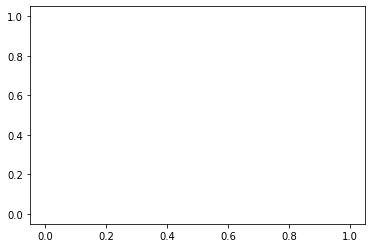

In [13]:

tsne = TSNE(n_components=2, init='pca', random_state=0)

result = tsne.fit_transform(H)
fig = plot_embedding(result,gt)
plt.show(fig)